# TECNOLOGICO DE MONTEREY
## Actividad Semanal -- 7 Cluster
### Maria de La Paz Rico

Noviembre - 2022

 Cristian Miranda - A01793718


Este notebook se basa en información de target
![imagen.png](https://www.america-retail.com/static//2020/12/target01.jpg)


Ahora imagina que somos parte del equipo de data science de la empresa Target, una de las tiendas con mayor presencia en Estados Unidos. El departamento de logistica acude a nosotros para saber donde le conviene poner sus almacenes, para que se optimice el gasto de gasolina, los tiempos de entrega de los productos y se disminuyan costos. Para ello, nos pasan los datos de latitud y longitud de cada una de las tiendas.

https://www.kaggle.com/datasets/saejinmahlauheinert/target-store-locations?select=target-locations.csv

Si quieres saber un poco más de graficas geográficas consulta el siguiente notebook
https://colab.research.google.com/github/QuantEcon/quantecon-notebooks-datascience/blob/master/applications/maps.ipynb#scrollTo=uo2oPtSCeAOz

In [3]:
#! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import geopandas

Importa la base de datos

In [3]:
url="https://raw.githubusercontent.com/marypazrf/bdd/main/target-locations.csv"
df=pd.read_csv(url)

Exploremos los datos.

In [5]:
df.head()

,name,latitude,longitude,address,phone,website
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1839 non-null   object 
 1   latitude   1839 non-null   float64
 2   longitude  1839 non-null   float64
 3   address    1839 non-null   object 
 4   phone      1839 non-null   object 
 5   website    1839 non-null   object 
dtypes: float64(2), object(4)
memory usage: 86.3+ KB


**Definición de Latitud y Longitud**

**Latitud** Es la distancia en grados, minutos y segundos que hay con respecto al paralelo principal, que es el ecuador (0º). La latitud puede ser norte y sur.

**Longitud**: Es la distancia en grados, minutos y segundos que hay con respecto al meridiano principal, que es el meridiano de Greenwich (0º).La longitud puede ser este y oeste.

In [7]:
latlong=df[["latitude","longitude"]]

¡Visualizemos los datos!, para empezar a notar algún patron. 

A simple vista pudieramos pensar que tenemos algunos datos atípicos u outliers, pero .... no es así, simplemente esta grafica no nos está dando toda la información.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

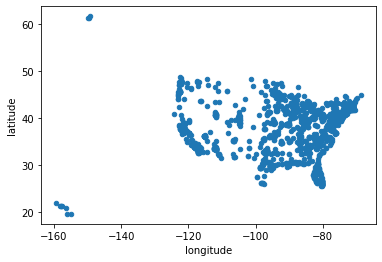

In [8]:
#extrae los datos interesantes
latlong.plot.scatter( "longitude","latitude")

In [9]:
latlong.describe()

,latitude,longitude
count,1839.000000,1839.000000
mean,37.791238,-91.986881
std,5.272299,16.108046
min,19.647855,-159.376962
25%,33.882605,-98.268828
50%,38.955432,-87.746346
75%,41.658341,-80.084833
max,61.577919,-68.742331


Para entender un poco más, nos auxiliaremos de una librería para graficar datos geográficos. Esto nos ayudara a tener un mejor entendimiento de ellos.




In [11]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

In [12]:
df["Coordinates"] = list(zip(df.longitude, df.latitude))
df["Coordinates"] = df["Coordinates"].apply(Point)
df.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417369999999 33.2242254)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98977789999999 33.3345501)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593169999999 30.6028747)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.9715595 34.5601477)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.4464222 31.2660613)


In [13]:
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")
gdf.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606)


In [14]:
#mapa

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,889953.0,Oceania,Fiji,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,58005463.0,Africa,Tanzania,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253.0,Africa,W. Sahara,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,37589262.0,North America,Canada,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,328239523.0,North America,United States of America,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [15]:
#graficar el mapa
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

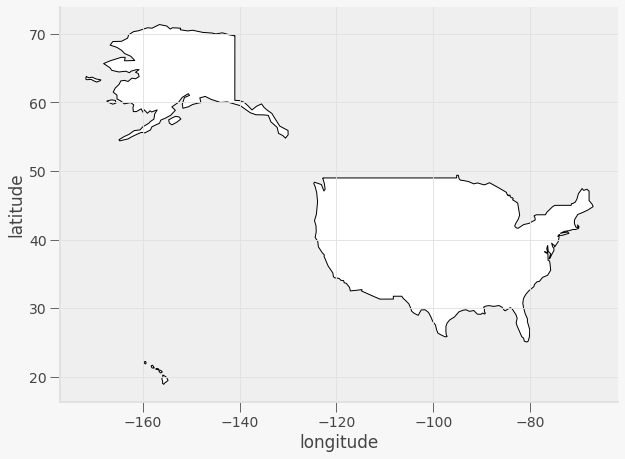

In [16]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'United States of America'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

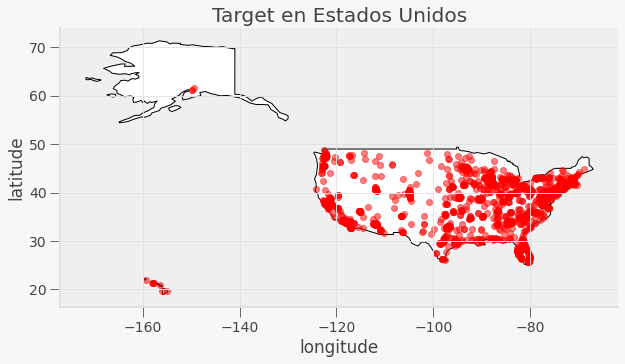

In [17]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

¿qué tal ahora?, tiene mayor sentido verdad, entonces los datos lejanos no eran atípicos, de aquí la importancia de ver los datos con el tipo de gráfica correcta.

Ahora sí, implementa K means a los datos de latitud y longitud :) y encuentra donde colocar los almacenes. 

Nota: si te llama la atención implementar alguna otra visualización con otra librería, lo puedes hacer, no hay restricciones.

**Encuentra las latitudes y longitudes de los almacenes, ¿qué ciudad es?, ¿a cuantas tiendas va surtir?, ¿sabes a que distancia estará?**

In [125]:
# Importando modulos
from sklearn.cluster import KMeans
import seaborn as sns

# !pip install yellowbrick --user
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer


import warnings
warnings.filterwarnings('ignore')

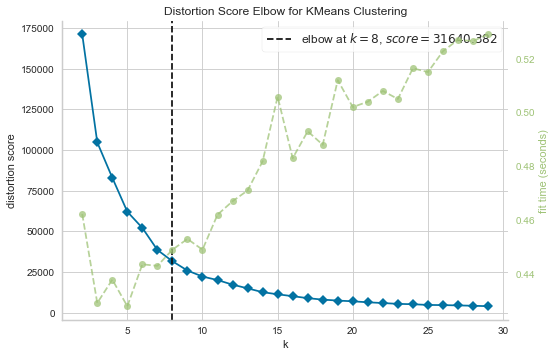

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
# Seleccion de clusters
# Elbow Method for K means
kmeans = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(kmeans, k=(2,30), timings= True)
visualizer.fit(latlong)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

In [21]:
# Entrenamiento del modelo
kmeans = KMeans(n_clusters=visualizer.elbow_value_, random_state=0).fit(latlong)

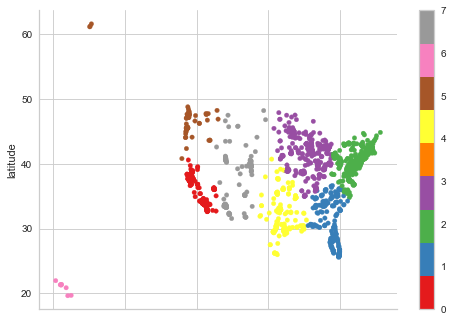

In [83]:
# Grafica de clusters
#sns.scatterplot(x = latlong.iloc[:,0], y = latlong.iloc[:,1], hue=kmeans.labels_)
latlong.plot.scatter( "longitude","latitude",c=kmeans.labels_,cmap='Set1')
plt.show()

In [143]:
kmeans.labels_

kmeans.cluster_centers_

array([[  35.43471729, -118.94132621],
       [  31.12636901,  -82.56606241],
       [  40.35125436,  -75.64454757],
       [  41.6269679 ,  -88.92791184],
       [  32.00463944,  -96.16688401],
       [  46.97944073, -122.66305544],
       [  20.94542771, -157.31225085],
       [  37.56677907, -108.56162352]])

In [150]:
label_center_dict = {k:v for k, v in zip(kmeans.labels_, kmeans.cluster_centers_)}
label_center_dict 
#numbers['new_col'] = kmean_model.labels_
#numbers['new_col'].replace(label_center_dict, inplace = True)

{1: array([  37.56677907, -108.56162352])}

In [118]:
# Anexo de clusters por coordenads
latlong['Cluster'] = kmeans.labels_
latlong

,latitude,longitude,Cluster
0,33.224225,-86.804174,1
1,33.334550,-86.989778,1
2,30.602875,-87.895932,1
3,34.560148,-86.971559,1
4,31.266061,-85.446422,1
...,...,...,...
1834,43.034293,-88.176840,3
1835,42.989604,-88.259806,3
1836,42.846799,-106.264166,7
1837,41.162019,-104.800048,7


In [103]:
from geopy.geocoders import Nominatim
import geopy.distance

import collections
geolocator = Nominatim(user_agent="google")

**Latitudes y longitudes de los almacenes:**

In [61]:
kmeans.cluster_centers_

array([[  35.43471729, -118.94132621],
       [  31.12636901,  -82.56606241],
       [  40.35125436,  -75.64454757],
       [  41.6269679 ,  -88.92791184],
       [  32.00463944,  -96.16688401],
       [  46.97944073, -122.66305544],
       [  20.94542771, -157.31225085],
       [  37.56677907, -108.56162352]])

**Ciudades de los almacenes:**

In [126]:
for i in range(kmeans.cluster_centers_.shape[0]):
    coor = str(kmeans.cluster_centers_[i][0]) + ',' + str(kmeans.cluster_centers_[i][1])
    location = geolocator.reverse(coor)
    print(i ,')', location)

0 ) 5666, Adolphus Avenue, Kern River Oil Field, Kern County, California, 93308, United States
1 ) Ware County, Georgia, 31550, United States
2 ) North Funk Road, Gabelsville, Colebrookdale Township, Berks County, Pennsylvania, 19512, United States
3 ) Baptist Church, East 1250th Road, Paw Paw Township, LaSalle County, Illinois, 60518, United States
4 ) County Road 3300, Navarro County, Texas, United States
5 ) Thurston County, Washington, United States
6 ) United States
7 ) Montezuma County, Colorado, United States


**Tiendas que se surten por Cluster:**

In [127]:
counter = collections.Counter(kmeans.labels_)
pd.DataFrame.from_dict(counter, orient='index').reset_index().sort_values(by='index')

,index,0
2,0,219
0,1,260
6,2,485
5,3,451
4,4,211
1,5,73
7,6,8
3,7,132


**Distancias a los almacenes:**

In [133]:
from scipy.spatial.distance import cdist
dm = cdist(latlong.iloc[:,:2], centroids)
dm

array([[32.21308501,  4.72890989, 13.24129137, ..., 38.40657949,
        71.56925189, 22.18658141],
       [32.02049565,  4.94422112, 13.33972975, ..., 38.19379231,
        71.40546586, 21.9830909 ],
       [31.41915376,  5.35551612, 15.65654237, ..., 38.43103964,
        70.08488886, 21.80749372],
       ...,
       [14.68500393, 26.43801465, 30.72114584, ..., 16.91160214,
        55.54797029,  5.75820483],
       [15.25705573, 24.39394117, 29.16677074, ..., 18.78641656,
        56.2693706 ,  5.203384  ],
       [11.44607333, 30.80447557, 35.28298144, ..., 12.38148723,
        51.68858211,  6.3092575 ]])

In [155]:
centroids = pd.DataFrame(kmeans.cluster_centers_,columns=['lat_centr','lon_centr'])
centroids['Cluster'] = centroids.index.values
centroids

,lat_centr,lon_centr,Cluster
0,35.434717,-118.941326,0
1,31.126369,-82.566062,1
2,40.351254,-75.644548,2
3,41.626968,-88.927912,3
4,32.004639,-96.166884,4
5,46.979441,-122.663055,5
6,20.945428,-157.312251,6
7,37.566779,-108.561624,7


In [151]:
latlong.sample(10)

,latitude,longitude,Cluster
1263,35.686783,-78.579406,2
454,28.396288,-81.485061,1
953,44.730105,-93.214004,3
670,39.779389,-85.986320,3
1700,37.639763,-77.511202,2
143,34.188561,-118.371396,0
1412,40.210768,-75.498370,2
1808,42.598540,-88.415849,3
1143,40.757304,-73.835146,2
1321,41.629281,-81.429787,2


In [156]:
# Distancia de 1 almancen a una tienda
coords_1 = (35.434717, -118.941326)
coords_2 = (34.188561,-118.371396)

geopy.distance.geodesic(coords_1, coords_2).km

147.7521462668502

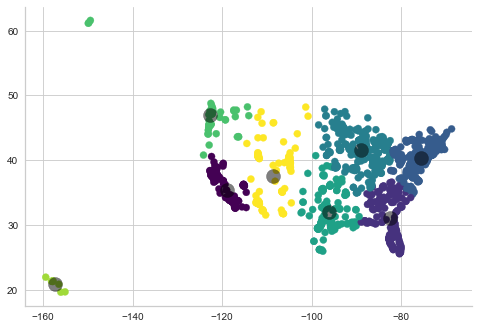

In [124]:
# Grafica
plt.scatter( latlong.iloc[:, 1],latlong.iloc[:, 0], c=latlong['Cluster'], s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter( centers[:, 1], centers[:, 0],c='black', s=200, alpha=0.5);

**¿Cómo elegiste el número de almacenes?, justifica tu respuesta técnicamente.**

Se eligió a partir de la técnica del codo que sirve para determinar el número óptimo de clusters en un conjunto de datos.

**¿qué librerías nos pueden ayudar a graficar este tipo de datos?**

Las librerias que funciona  para visualizar el tipo de datos espaciales son aquellas que consideran esta dimensión de datos por ejemplo:

**1. Arcpy**  
Tiene como base el programa ArcGis y permite no solo crear mapas sino también manejarlos, convertirlos y producirlos a partir de datos.

**2. Geopandas**  
Geopandas es muy similar a pandas para hacer transformaciones pero considera los datos espaciales en complemento con Fiona y Shapely

**3. GDAL/OGR**  
Esta librerias es para trabajar con otros formatos por ejemplo: QGIS, ArcGIS, ERDAS, ENVI, GRASS GIS 





**¿Consideras importante que se grafique en un mapa?, ¿por qué?**
Sí es importante ya que si no se cuenta con un contexto geográfico para este tipo de datos, se puede llegar a tener puntos de vista sesgados de la información. Por ejemplo para el caso de este ejercicio, existen puntos muy lejanos que dan la idea de ser outliers, sin embargo gracias al mapa se pudo identificar que son territorios de un mismo país. 

**Agrega las conclusiones**

En este ejercicio se pudo llegar a comprender que la información comprendida y visualizada de manera integral juega un papel importante en la comprensión inicial del problema. Al utilizar un criterio netamente técnico para determinar la cantidad óptima de clusters (método elbow) se pudo identificar que no necesariamente ese número es el mejor ya que se pueden considerar criterios mucho más especificos de acuerdo a los lineamientos de la compañia ya que sin un contexto empresarial es dificil explirar las razones por las que se deciden las cosas.